In [1]:
import scipy as sp
import numpy as np
from algorithms.pagerank import pagerank
import timeit
import multiprocessing as mp

In [44]:
def run_experiment1(sizes: list[float]):
    results = dict()
    global d
    d = 1e-6
    for n in sizes:
        results[n] = {'initial': [],
                     'sparse': []}
        global mat
        mat = sp.sparse.random(n, n, density=0.6, format='coo')
        mat.data[mat.data != 0] = 1
        mat.setdiag(0) 
        results[n]['initial'].append(timeit.timeit('pagerank(mat, d)', globals=globals(), number=10))
        results[n]['initial'].append(pagerank(mat, d))
    
        mat.data = np.random.choice([0, 1], size=mat.data.shape[0], p=[0.5, 0.5]) 
        mat.eliminate_zeros()
        results[n]['sparse'].append(timeit.timeit('pagerank(mat, d)', globals=globals(), number=10))
        results[n]['sparse'].append(pagerank(mat, d))
        print("finished with n =", n)
    return results

In [45]:
all_results = run_experiment1([500 * (i + 1) for i in range(9)])

finished with n = 500
finished with n = 1000
finished with n = 1500
finished with n = 2000
finished with n = 2500
finished with n = 3000
finished with n = 3500
finished with n = 4000
finished with n = 4500


In [ ]:
pr_num = 16
tasks = [[500 * (i + 1)] for i in range(pr_num)]

In [ ]:
with mp.Pool(pr_num) as p:
    result = list(p.map(run_experiment1, tasks))

In [39]:
def run_experiment2(probs: list[float]):
    results = dict()
    n = 30_000
    init_mat = sp.sparse.random(n, n, density=0.6, format='coo')
    init_mat.data[init_mat.data != 0] = 1
    init_mat.setdiag(0) 
    global d
    d = 1e-6
    for p in probs:
        results[p] = {'initial': [],
                     'sparse': []}
        global mat

        mat = init_mat.copy()
       
        results[p]['initial'].append(timeit.timeit('pagerank(mat, d)', globals=globals(), number=10))
        results[p]['initial'].append(pagerank(mat, d))
    
        mat.data = np.random.choice([0, 1], size=mat.data.shape[0], p=[p, 1-p])  
        mat.eliminate_zeros()

        results[p]['sparse'].append(timeit.timeit('pagerank(mat, d)', globals=globals(), number=10))
        results[p]['sparse'].append(pagerank(mat, d))
        print("finished with p =", p)
    return results

In [40]:
all_results = run_experiment2([0.1 * (i + 1) for i in range(9)])

finished with p = 0.1
finished with p = 0.2
finished with p = 0.30000000000000004
finished with p = 0.4
finished with p = 0.5
finished with p = 0.6000000000000001
finished with p = 0.7000000000000001
finished with p = 0.8
finished with p = 0.9


In [17]:
pr_num = 8
tasks = [[0.1 * (i + 1)] for i in range(pr_num)]
tasks

[[0.1],
 [0.2],
 [0.30000000000000004],
 [0.4],
 [0.5],
 [0.6000000000000001],
 [0.7000000000000001],
 [0.8]]

In [18]:
with mp.Pool(pr_num) as p:
    result = list(p.map(run_experiment2, tasks))

finished with p = 0.2
finished with p = 0.30000000000000004
finished with p = 0.6000000000000001
finished with p = 0.7000000000000001
finished with p = 0.1
finished with p = 0.4
finished with p = 0.5
finished with p = 0.8


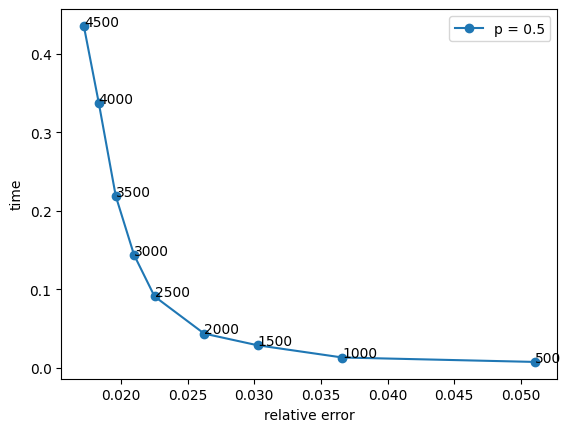

In [46]:
# all_results = dict()
# for res in result:
#     for num in res.keys():
#         all_results[num] = res[num]

n_v = all_results.keys()
sparse_time = [v['sparse'][0] for v in all_results.values()]
init_time = [v['initial'][0] for v in all_results.values()]
error = [np.linalg.norm(v['sparse'][1] - v['initial'][1]) / np.linalg.norm(v['initial'][1]) for v in all_results.values()]

import matplotlib.pyplot as plt

n_v = [round(v, 2) for v in n_v]
plt.plot(error, sparse_time, '-o')
for i, param_value in enumerate(n_v):
    plt.annotate(str(param_value),
                     (error[i], sparse_time[i]))

plt.xlabel('relative error')
plt.ylabel('time')
plt.legend(['p = 0.5'])
plt.savefig('error_vs_time_n.png')

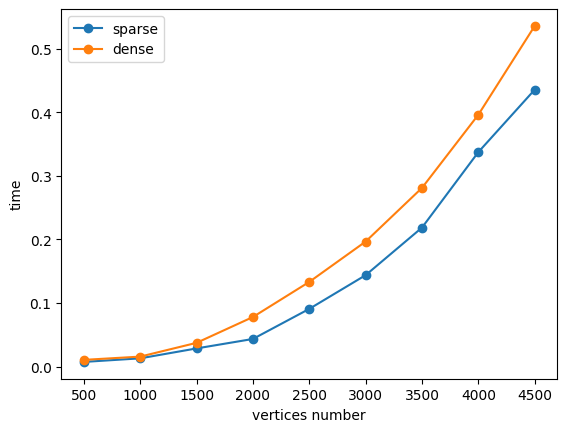

In [47]:
plt.plot(list(n_v), sparse_time, '-o')
plt.plot(list(n_v), init_time, '-o')

plt.xlabel('vertices number')
plt.ylabel('time')
plt.legend(['sparse', 'dense'])
plt.savefig('init_vs_sparse_time_n.png')

In [ ]:
plt.plot(list(n_v), sparse_time, '-o')
plt.plot(list(n_v), init_time, '-o')

plt.xlabel('probability')
plt.ylabel('time, s')
plt.legend(['sparse', 'dense'])
plt.savefig('init_vs_sparse_erro.png')